# I.  Préparation de données

## I.1 Dataraise

In [1]:
import pandas as pd

# lire le fichier Excel
excel_file = pd.ExcelFile("C:/dataraise_followers_1674217463832.xls")

# boucler à travers chaque feuille
for sheet_name in ["Nouveaux abonnés","Lieu", "Fonction", "Niveau hiérarchique","Secteur" ,"Taille de l’entreprise"]:
    # lire la feuille dans un dataframe
    df = pd.read_excel(excel_file, sheet_name=sheet_name)
    
    # compter le nombre de valeurs manquantes
    num_missing = df.isna().sum().sum()
    
    if num_missing > 0:
        print(f"La feuille {sheet_name} contient {num_missing} valeurs manquantes.")
    else:
        num_missing = 0
        print(f"La feuille {sheet_name} ne contient pas de valeurs manquantes. Nombre de valeurs manquantes: {num_missing}")

#Verification donnes manquantes dataraise_followers 

La feuille Nouveaux abonnés ne contient pas de valeurs manquantes. Nombre de valeurs manquantes: 0
La feuille Lieu ne contient pas de valeurs manquantes. Nombre de valeurs manquantes: 0
La feuille Fonction ne contient pas de valeurs manquantes. Nombre de valeurs manquantes: 0
La feuille Niveau hiérarchique ne contient pas de valeurs manquantes. Nombre de valeurs manquantes: 0
La feuille Secteur ne contient pas de valeurs manquantes. Nombre de valeurs manquantes: 0
La feuille Taille de l’entreprise ne contient pas de valeurs manquantes. Nombre de valeurs manquantes: 0


## I.2 Sqops

In [10]:
import pandas as pd

# lire le fichier Excel
excel_file = pd.ExcelFile("C:/sqops_followers_1674217384515.xls")

# boucler à travers chaque feuille
for sheet_name in ["Nouveaux abonnés","Lieu", "Fonction", "Niveau hiérarchique","Secteur" ,"Taille de l’entreprise"]:
    # lire la feuille dans un dataframe
    df = pd.read_excel(excel_file, sheet_name=sheet_name)
    
    # compter le nombre de valeurs manquantes
    num_missing = df.isna().sum().sum()
    
    if num_missing > 0:
        print(f"La feuille {sheet_name} contient {num_missing} valeurs manquantes.")
    else:
        num_missing = 0
        print(f"La feuille {sheet_name} ne contient pas de valeurs manquantes. Nombre de valeurs manquantes: {num_missing}")

#Verification donnes manquantes sqops_followers 

La feuille Nouveaux abonnés ne contient pas de valeurs manquantes. Nombre de valeurs manquantes: 0
La feuille Lieu ne contient pas de valeurs manquantes. Nombre de valeurs manquantes: 0
La feuille Fonction ne contient pas de valeurs manquantes. Nombre de valeurs manquantes: 0
La feuille Niveau hiérarchique ne contient pas de valeurs manquantes. Nombre de valeurs manquantes: 0
La feuille Secteur ne contient pas de valeurs manquantes. Nombre de valeurs manquantes: 0
La feuille Taille de l’entreprise ne contient pas de valeurs manquantes. Nombre de valeurs manquantes: 0


In [3]:
import warnings
warnings.filterwarnings("ignore")

# II. ARIMA Par année

In [3]:
import warnings

# ignorer les warnings de la catégorie FutureWarning
warnings.filterwarnings('ignore', category=FutureWarning)

# votre code ici

## II.1 Dataraise

Mean Absolute Error (MAE): 0.31841874127463143
Coefficient de détermination R² : 0.535323816603936
mse : 0.46467618339606404
rmse : 0.6816716096450431
mae : 0.31841874127463143


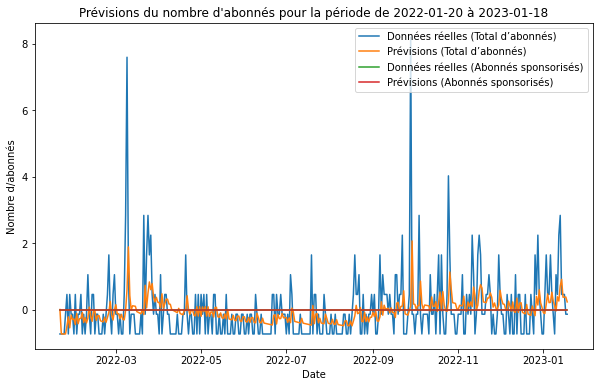

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")


# lire le fichier Excel
data = pd.read_excel("C:/dataraise_followers_1674217463832.xls",sheet_name="Nouveaux abonnés")
# Convertir la colonne 'Date' en datetime
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
# Définir la colonne 'Date' comme index
data.set_index('Date', inplace=True)

# Standardiser les valeurs des colonnes 'Total d\'abonnés' et 'Abonnés sponsorisés'
scaler = StandardScaler()
data[['Total d’abonnés', 'Abonnés sponsorisés']] = scaler.fit_transform(data[['Total d’abonnés', 'Abonnés sponsorisés']].values)

# Define the period of analysis
period = (pd.to_datetime('2022-01-20'), pd.to_datetime('2023-01-18'))

# Select only the 'Total d’abonnés' and 'Abonnés sponsorisés' columns
data = data[['Total d’abonnés', 'Abonnés sponsorisés']]

# Tracer un graphique pour la période choisie
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Sélectionner les données pour la période courante
mask = (data.index >= period[0]) & (data.index <= period[1])
data_period = data[mask]

# Entraîner le modèle SARIMAX sur les données de la période courante pour la colonne "Total d’abonnés"
model1 = SARIMAX(data_period['Total d’abonnés'], order=(1, 1, 1))
model_fit1 = model1.fit()

# Entraîner le modèle SARIMAX sur les données de la période courante pour la colonne "Abonnés sponsorisés"
model2 = SARIMAX(data_period['Abonnés sponsorisés'], order=(1, 1, 1))
model_fit2 = model2.fit()

# Obtenir les prédictions du modèle pour la période courante
predictions1 = model_fit1.predict(start=data_period.index[0], end=data_period.index[-1], typ='levels')
predictions2 = model_fit2.predict(start=data_period.index[0], end=data_period.index[-1], typ='levels')

# Concaténer les prédictions pour les deux colonnes
predictions = pd.concat([predictions1, predictions2], axis=1)

r2 = r2_score(data_period, predictions)
mse = mean_squared_error(data_period, predictions)
rmse = np.sqrt(mse)

# Calculate MAE for Total d'abonnés
mae1 = mean_absolute_error(data_period['Total d’abonnés'], predictions1)

# Calculate MAE for Abonnés sponsorisés
mae2 = mean_absolute_error(data_period['Abonnés sponsorisés'], predictions2)

# Calculate overall MAE
mae = (mae1 + mae2) / 2

print('Mean Absolute Error (MAE):', mae)
print('Coefficient de détermination R² :', r2)
print('mse :', mse)
print('rmse :', rmse)
print('mae :', mae)

# Tracer le graphique correspondant à la période courante
ax.plot(data_period.index, data_period['Total d’abonnés'], label='Données réelles (Total d’abonnés)')
ax.plot(data_period.index, predictions1, label='Prévisions (Total d’abonnés)')
ax.plot(data_period.index, data_period['Abonnés sponsorisés'], label='Données réelles (Abonnés sponsorisés)')
ax.plot(data_period.index, predictions2, label='Prévisions (Abonnés sponsorisés)')

#Ajouter une légende, un titre et des labels pour les axes
ax.legend()
ax.set_title("Prévisions du nombre d'abonnés pour la période de {} à {}".format(period[0].strftime('%Y-%m-%d'), period[1].strftime('%Y-%m-%d')))
ax.set_xlabel('Date')
ax.set_ylabel('Nombre d/abonnés')

#Afficher le graphique
plt.show()


## II.2 Sqops

Mean Absolute Error (MAE): 0.1711228297043604
Coefficient de détermination R² : 0.6338680561601732
mse : 0.36613194383982683
rmse : 0.605088376883763
mae : 0.1711228297043604


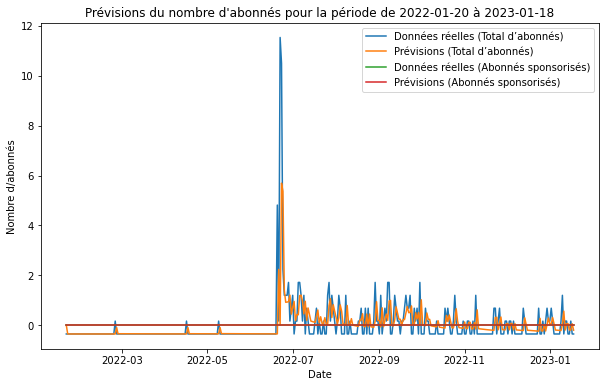

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")


# lire le fichier Excel
data = pd.read_excel("C:/sqops_followers_1674217384515.xls",sheet_name="Nouveaux abonnés")
# Convertir la colonne 'Date' en datetime
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
# Définir la colonne 'Date' comme index
data.set_index('Date', inplace=True)

# Standardiser les valeurs des colonnes 'Total d\'abonnés' et 'Abonnés sponsorisés'
scaler = StandardScaler()
data[['Total d’abonnés', 'Abonnés sponsorisés']] = scaler.fit_transform(data[['Total d’abonnés', 'Abonnés sponsorisés']].values)

# Define the period of analysis
period = (pd.to_datetime('2022-01-20'), pd.to_datetime('2023-01-18'))

# Select only the 'Total d’abonnés' and 'Abonnés sponsorisés' columns
data = data[['Total d’abonnés', 'Abonnés sponsorisés']]

# Tracer un graphique pour la période choisie
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Sélectionner les données pour la période courante
mask = (data.index >= period[0]) & (data.index <= period[1])
data_period = data[mask]

# Entraîner le modèle SARIMAX sur les données de la période courante pour la colonne "Total d’abonnés"
model1 = SARIMAX(data_period['Total d’abonnés'], order=(1, 1, 1))
model_fit1 = model1.fit()

# Entraîner le modèle SARIMAX sur les données de la période courante pour la colonne "Abonnés sponsorisés"
model2 = SARIMAX(data_period['Abonnés sponsorisés'], order=(1, 1, 1))
model_fit2 = model2.fit()

# Obtenir les prédictions du modèle pour la période courante
predictions1 = model_fit1.predict(start=data_period.index[0], end=data_period.index[-1], typ='levels')
predictions2 = model_fit2.predict(start=data_period.index[0], end=data_period.index[-1], typ='levels')

# Concaténer les prédictions pour les deux colonnes
predictions = pd.concat([predictions1, predictions2], axis=1)

r2 = r2_score(data_period, predictions)
mse = mean_squared_error(data_period, predictions)
rmse = np.sqrt(mse)


# Calculate MAE for Total d'abonnés
mae1 = mean_absolute_error(data_period['Total d’abonnés'], predictions1)

# Calculate MAE for Abonnés sponsorisés
mae2 = mean_absolute_error(data_period['Abonnés sponsorisés'], predictions2)

# Calculate overall MAE
mae = (mae1 + mae2) / 2

print('Mean Absolute Error (MAE):', mae)
print('Coefficient de détermination R² :', r2)
print('mse :', mse)
print('rmse :', rmse)
print('mae :', mae)

# Tracer le graphique correspondant à la période courante
ax.plot(data_period.index, data_period['Total d’abonnés'], label='Données réelles (Total d’abonnés)')
ax.plot(data_period.index, predictions1, label='Prévisions (Total d’abonnés)')
ax.plot(data_period.index, data_period['Abonnés sponsorisés'], label='Données réelles (Abonnés sponsorisés)')
ax.plot(data_period.index, predictions2, label='Prévisions (Abonnés sponsorisés)')

#Ajouter une légende, un titre et des labels pour les axes
ax.legend()
ax.set_title("Prévisions du nombre d'abonnés pour la période de {} à {}".format(period[0].strftime('%Y-%m-%d'), period[1].strftime('%Y-%m-%d')))
ax.set_xlabel('Date')
ax.set_ylabel('Nombre d/abonnés')

#Afficher le graphique
plt.show()


## II.3 Sqops Prévision SARIMAX

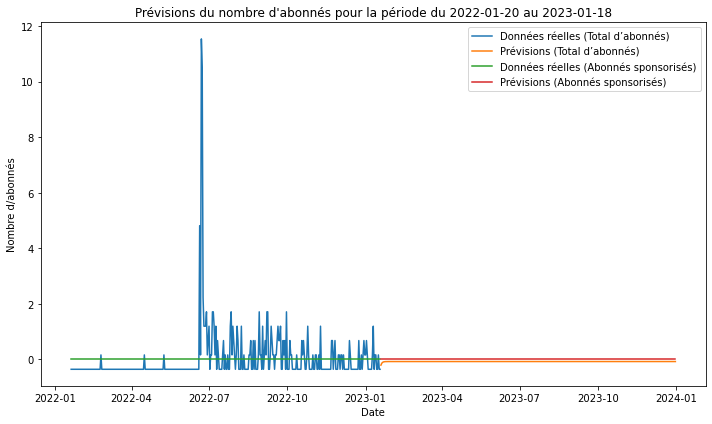

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

#lire le fichier Excel
data = pd.read_excel("C:/sqops_followers_1674217384515.xls", sheet_name="Nouveaux abonnés")

#Convertir la colonne 'Date' en datetime
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

#Définir la colonne 'Date' comme index
data.set_index('Date', inplace=True)

#Standardiser les valeurs des colonnes 'Total d'abonnés' et 'Abonnés sponsorisés'
scaler = StandardScaler()
data[['Total d’abonnés', 'Abonnés sponsorisés']] = scaler.fit_transform(data[['Total d’abonnés', 'Abonnés sponsorisés']].values)

#Define the period of analysis
period = (pd.to_datetime('2022-01-20'), pd.to_datetime('2023-01-18'))

#Select only the 'Total d’abonnés' and 'Abonnés sponsorisés' columns
data = data[['Total d’abonnés', 'Abonnés sponsorisés']]



#Entraîner le modèle SARIMAX sur les données de la période courante pour la colonne "Total d’abonnés"
model1 = SARIMAX(data.loc[period[0]:period[1], 'Total d’abonnés'], order=(1, 1, 1))
model_fit1 = model1.fit()




#Entraîner le modèle SARIMAX sur les données de la période courante pour la colonne "Abonnés sponsorisés"
model2 = SARIMAX(data.loc[period[0]:period[1], 'Abonnés sponsorisés'], order=(1, 1, 1))
model_fit2 = model2.fit()



#Générer des prévisions pour la période du 19/01/2023 au 31/12/2023
forecast1 = model_fit1.predict(start=pd.to_datetime('2023-01-19'), end=pd.to_datetime('2023-12-31'), typ='levels')
forecast2 = model_fit2.predict(start=pd.to_datetime('2023-01-19'), end=pd.to_datetime('2023-12-31'), typ='levels')



# Tracer le graphique correspondant à la période courante
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data.loc[period[0]:period[1]].index, data.loc[period[0]:period[1], 'Total d’abonnés'], label='Données réelles (Total d’abonnés)')
ax.plot(forecast1.index, forecast1, label='Prévisions (Total d’abonnés)')
ax.plot(data.loc[period[0]:period[1]].index, data.loc[period[0]:period[1], 'Abonnés sponsorisés'], label='Données réelles (Abonnés sponsorisés)')
ax.plot(forecast2.index, forecast2, label='Prévisions (Abonnés sponsorisés)')

# Ajouter une légende, un titre et des labels pour les axes
ax.legend()
ax.set_title("Prévisions du nombre d'abonnés pour la période du {} au {}".format(period[0].strftime('%Y-%m-%d'), period[1].strftime('%Y-%m-%d')))
ax.set_xlabel('Date')
ax.set_ylabel('Nombre d/abonnés')

# Afficher le graphique
plt.tight_layout()
plt.show()

## II.4 Dataraise Prévision SARIMAX

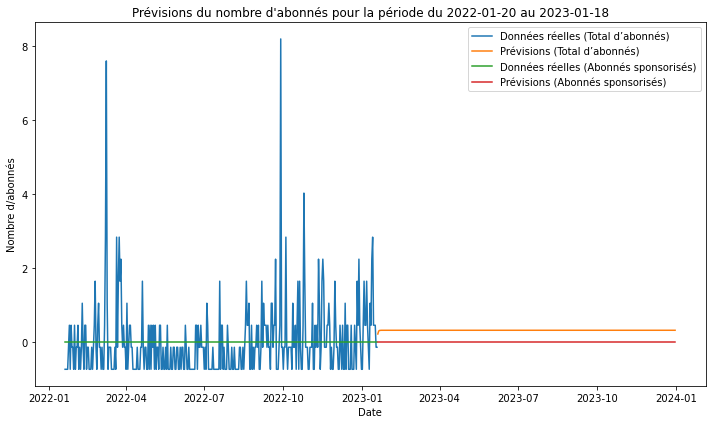

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

# lire le fichier Excel
data = pd.read_excel("C:/dataraise_followers_1674217463832.xls",sheet_name="Nouveaux abonnés")

#Convertir la colonne 'Date' en datetime
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

#Définir la colonne 'Date' comme index
data.set_index('Date', inplace=True)

#Standardiser les valeurs des colonnes 'Total d'abonnés' et 'Abonnés sponsorisés'
scaler = StandardScaler()
data[['Total d’abonnés', 'Abonnés sponsorisés']] = scaler.fit_transform(data[['Total d’abonnés', 'Abonnés sponsorisés']].values)

#Define the period of analysis
period = (pd.to_datetime('2022-01-20'), pd.to_datetime('2023-01-18'))

#Select only the 'Total d’abonnés' and 'Abonnés sponsorisés' columns
data = data[['Total d’abonnés', 'Abonnés sponsorisés']]



#Entraîner le modèle SARIMAX sur les données de la période courante pour la colonne "Total d’abonnés"
model1 = SARIMAX(data.loc[period[0]:period[1], 'Total d’abonnés'], order=(1, 1, 1))
model_fit1 = model1.fit()




#Entraîner le modèle SARIMAX sur les données de la période courante pour la colonne "Abonnés sponsorisés"
model2 = SARIMAX(data.loc[period[0]:period[1], 'Abonnés sponsorisés'], order=(1, 1, 1))
model_fit2 = model2.fit()



#Générer des prévisions pour la période du 19/01/2023 au 31/12/2023
forecast1 = model_fit1.predict(start=pd.to_datetime('2023-01-19'), end=pd.to_datetime('2023-12-31'), typ='levels')
forecast2 = model_fit2.predict(start=pd.to_datetime('2023-01-19'), end=pd.to_datetime('2023-12-31'), typ='levels')



# Tracer le graphique correspondant à la période courante
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data.loc[period[0]:period[1]].index, data.loc[period[0]:period[1], 'Total d’abonnés'], label='Données réelles (Total d’abonnés)')
ax.plot(forecast1.index, forecast1, label='Prévisions (Total d’abonnés)')
ax.plot(data.loc[period[0]:period[1]].index, data.loc[period[0]:period[1], 'Abonnés sponsorisés'], label='Données réelles (Abonnés sponsorisés)')
ax.plot(forecast2.index, forecast2, label='Prévisions (Abonnés sponsorisés)')

# Ajouter une légende, un titre et des labels pour les axes
ax.legend()
ax.set_title("Prévisions du nombre d'abonnés pour la période du {} au {}".format(period[0].strftime('%Y-%m-%d'), period[1].strftime('%Y-%m-%d')))
ax.set_xlabel('Date')
ax.set_ylabel('Nombre d/abonnés')

# Afficher le graphique
plt.tight_layout()
plt.show()

# III.  Régression polynomiale par année

## III.1 Dataraise

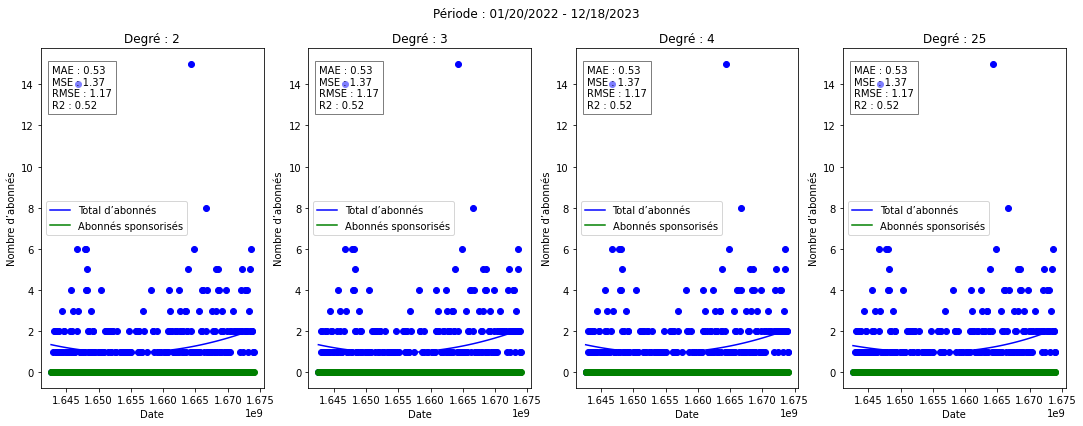

In [58]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

# lire le fichier Excel
data = pd.read_excel("C:/dataraise_followers_1674217463832.xls",sheet_name="Nouveaux abonnés")

# Convertir les dates en nombre flottant
x = []
for date in data['Date']:
    x.append(datetime.strptime(date, '%m/%d/%Y').timestamp())
x = np.array(x).reshape(-1, 1)

# Sélectionner les variables d'intérêt
y = data[['Total d’abonnés', 'Abonnés sponsorisés']]

# Définir les degrés de la régression polynomiale
degrees = [2, 3, 4, 25]

# Définir la période
period = (datetime(2022, 1, 20), datetime(2023, 12, 18))

# Tracer un graphique pour chaque degré de la régression polynomiale
fig, axes = plt.subplots(1, len(degrees), figsize=(15, 6))
for j, degree in enumerate(degrees):
    poly_reg = PolynomialFeatures(degree=degree)
    x_poly = poly_reg.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, y)

    # Obtenir les prédictions du modèle
    x_test = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
    x_test_poly = poly_reg.fit_transform(x_test)
    predictions = model.predict(x_test_poly)

    # Évaluer les performances du modèle
    mae = mean_absolute_error(y, model.predict(x_poly))
    rmse = np.sqrt(mean_squared_error(y, model.predict(x_poly)))
    mse = mean_squared_error(y, model.predict(x_poly))
    r2 = r2_score(y, model.predict(x_poly))

    # Tracer le graphique avec la courbe de régression polynomiale
    ax = axes[j]
    ax.set_title(f"Degré : {degree}")
    ax.plot(x_test, predictions[:, 0], color='blue', label='Total d’abonnés')
    ax.plot(x_test, predictions[:, 1], color='green', label='Abonnés sponsorisés')
    ax.scatter(x[:, 0], y.iloc[:, 0], color='blue')
    ax.scatter(x[:, 0], y.iloc[:, 1], color='green')
    ax.text(0.05, 0.95, f"MAE : {round(mae, 2)}\nMSE : {round(mse, 2)}\nRMSE : {round(rmse, 2)}\nR2 : {round(r2, 2)}", 
            transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    ax.set_xlabel('Date')
    ax.set_ylabel('Nombre d’abonnés')
    ax.legend()

plt.suptitle(f"Période : {period[0].strftime('%m/%d/%Y')} - {period[1].strftime('%m/%d/%Y')}")
plt.tight_layout()
plt.show()


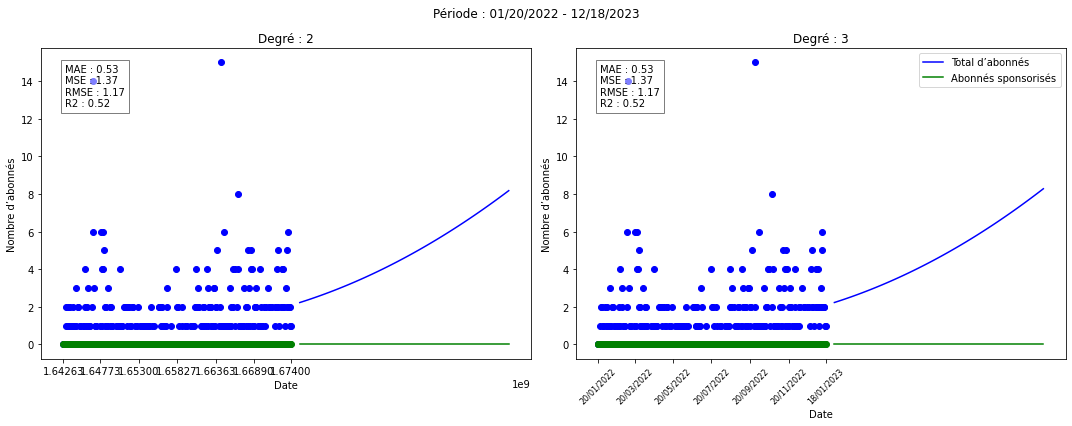

In [60]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

# lire le fichier Excel
data = pd.read_excel("C:/dataraise_followers_1674217463832.xls",sheet_name="Nouveaux abonnés")

# Convertir les dates en nombre flottant
x = []
for date in data['Date']:
    x.append(datetime.strptime(date, '%m/%d/%Y').timestamp())
x = np.array(x).reshape(-1, 1)

# Sélectionner les variables d'intérêt
y = data[['Total d’abonnés', 'Abonnés sponsorisés']]

# Définir les degrés de la régression polynomiale
degrees = [2,3]

# Définir la période
period = (datetime(2022, 1, 20), datetime(2023, 12, 18))

# Tracer un graphique pour chaque degré de la régression polynomiale
fig, axes = plt.subplots(1, len(degrees), figsize=(15, 6))
for j, degree in enumerate(degrees):
    poly_reg = PolynomialFeatures(degree=degree)
    x_poly = poly_reg.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, y)

    # Obtenir les prédictions du modèle
    #x_test = np.linspace(datetime(2022, 1, 20).timestamp(), datetime(2023, 1, 18).timestamp(), 100).reshape(-1, 1)
    x_test = np.linspace(datetime(2023, 2, 1).timestamp(), datetime(2023, 12, 31).timestamp(), 100).reshape(-1, 1)
    x_test_poly = poly_reg.fit_transform(x_test)
    predictions = model.predict(x_test_poly)

    # Évaluer les performances du modèle
    mae = mean_absolute_error(y, model.predict(x_poly))
    rmse = np.sqrt(mean_squared_error(y, model.predict(x_poly)))
    mse = mean_squared_error(y, model.predict(x_poly))
    r2 = r2_score(y, model.predict(x_poly))

    # Tracer le graphique avec la courbe de régression polynomiale

    ax = axes[j]
    ax.set_title(f"Degré : {degree}")
    ax.plot(x_test, predictions[:, 0], color='blue', label='Total d’abonnés')
    ax.plot(x_test, predictions[:, 1], color='green', label='Abonnés sponsorisés')
    ax.scatter(x[:, 0], y.iloc[:, 0], color='blue')
    ax.scatter(x[:, 0], y.iloc[:, 1], color='green')
    ax.text(0.05, 0.95, f"MAE : {round(mae, 2)}\nMSE : {round(mse, 2)}\nRMSE : {round(rmse, 2)}\nR2 : {round(r2, 2)}", 
            transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    ax.set_xlabel('Date')
    ax.set_ylabel('Nombre d’abonnés')
    ax.set_xticks([datetime(2022, 1, 20).timestamp(), datetime(2022, 3, 20).timestamp(), datetime(2022, 5, 20).timestamp(), datetime(2022, 7, 20).timestamp(), datetime(2022, 9, 20).timestamp(), datetime(2022, 11, 20).timestamp(), datetime(2023, 1, 18).timestamp()])
ax.set_xticklabels(['20/01/2022', '20/03/2022', '20/05/2022', '20/07/2022', '20/09/2022', '20/11/2022', '18/01/2023'], rotation=45)
ax.tick_params(axis='x', labelsize=8)
ax.legend()

plt.suptitle(f"Période : {period[0].strftime('%m/%d/%Y')} - {period[1].strftime('%m/%d/%Y')}")
plt.tight_layout()

#fig, axes = plt.subplots(1, len(degrees), figsize=(20, 20))
#plt.subplots_adjust(wspace=0.3)

plt.show()


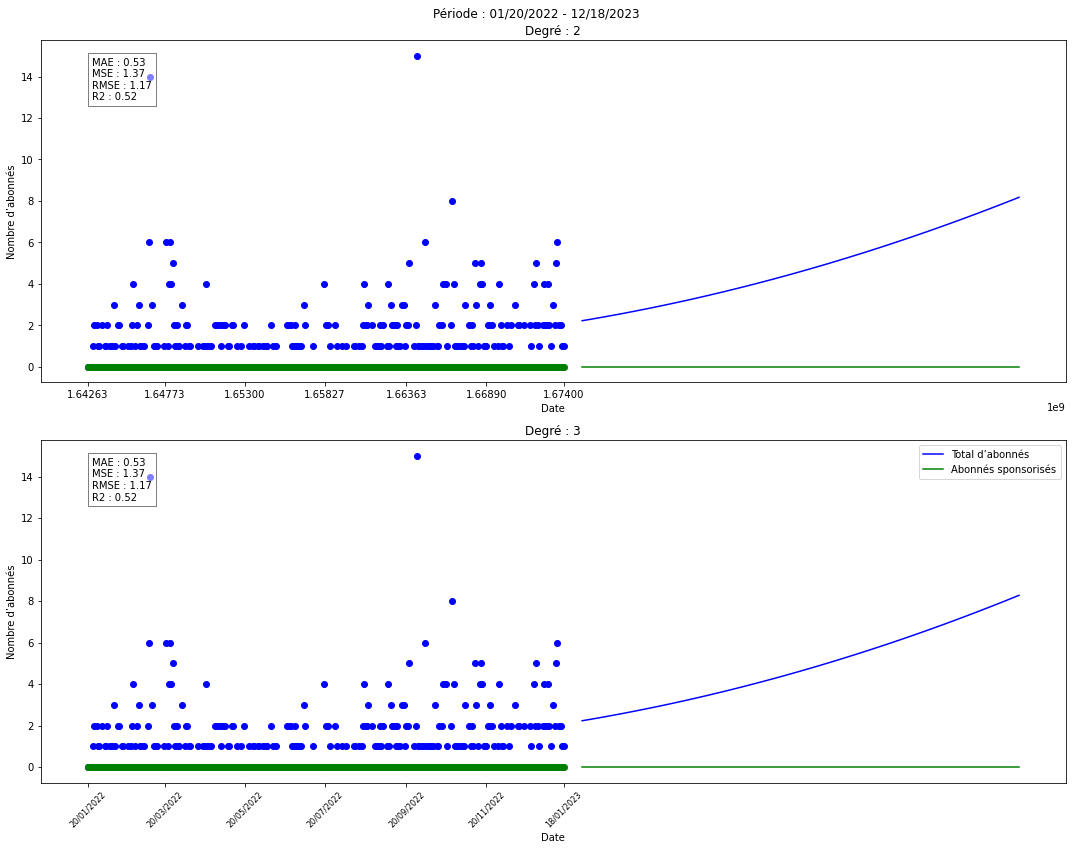

In [69]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

# lire le fichier Excel
data = pd.read_excel("C:/dataraise_followers_1674217463832.xls",sheet_name="Nouveaux abonnés")

# Convertir les dates en nombre flottant
x = []
for date in data['Date']:
    x.append(datetime.strptime(date, '%m/%d/%Y').timestamp())
x = np.array(x).reshape(-1, 1)

# Sélectionner les variables d'intérêt
y = data[['Total d’abonnés', 'Abonnés sponsorisés']]

# Définir les degrés de la régression polynomiale
degrees = [2,3]

# Définir la période
period = (datetime(2022, 1, 20), datetime(2023, 12, 18))

# Tracer un graphique pour chaque degré de la régression polynomiale
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

for j, degree in enumerate(degrees):
    poly_reg = PolynomialFeatures(degree=degree)
    x_poly = poly_reg.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, y)

    # Obtenir les prédictions du modèle
    x_test = np.linspace(datetime(2023, 2, 1).timestamp(), datetime(2023, 12, 31).timestamp(), 100).reshape(-1, 1)
    x_test_poly = poly_reg.fit_transform(x_test)
    predictions = model.predict(x_test_poly)

    # Évaluer les performances du modèle
    mae = mean_absolute_error(y, model.predict(x_poly))
    rmse = np.sqrt(mean_squared_error(y, model.predict(x_poly)))
    mse = mean_squared_error(y, model.predict(x_poly))
    r2 = r2_score(y, model.predict(x_poly))

    # Tracer le graphique avec la courbe de régression polynomiale
    ax = axes[j]
    ax.set_title(f"Degré : {degree}")
    ax.plot(x_test, predictions[:, 0], color='blue', label='Total d’abonnés')
    ax.plot(x_test, predictions[:, 1], color='green', label='Abonnés sponsorisés')
    ax.scatter(x[:, 0], y.iloc[:, 0], color='blue')
    ax.scatter(x[:, 0], y.iloc[:, 1], color='green')
    ax.text(0.05, 0.95, f"MAE : {round(mae, 2)}\nMSE : {round(mse, 2)}\nRMSE : {round(rmse, 2)}\nR2 : {round(r2, 2)}", 
            transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    ax.set_xlabel('Date')
    ax.set_ylabel('Nombre d’abonnés')
    ax.set_xticks([datetime(2022, 1, 20).timestamp(), datetime(2022, 3, 20).timestamp(), datetime(2022, 5, 20).timestamp(), datetime(2022, 7, 20).timestamp(), datetime(2022, 9, 20).timestamp(), datetime(2022, 11, 20).timestamp(), datetime(2023, 1, 18).timestamp()])
ax.set_xticklabels(['20/01/2022', '20/03/2022', '20/05/2022', '20/07/2022', '20/09/2022', '20/11/2022', '18/01/2023'], rotation=45)
ax.tick_params(axis='x', labelsize=8)
ax.legend()

plt.suptitle(f"Période : {period[0].strftime('%m/%d/%Y')} - {period[1].strftime('%m/%d/%Y')}")
plt.tight_layout()

#fig, axes = plt.subplots(1, len(degrees), figsize=(20, 20))
#plt.subplots_adjust(wspace=0.3)

plt.show()



In [ ]:
le code trace un graphique pour un degré de la régression polynomiale,
montrant les données historiques de "Dataraise",les prévisions et les performances du modèle.
La courbe montre une augmentation du nombre d'abonnés dans le futur à partir de 19 janvier 2023
par rapport à une intervalle de date historique allant de 20 janvier 2022 jusqu'à 18 janvier 2023 
tandis que une évolution qui est constante au niveau des abonnés sponsorisés.

## III.2 Sqops

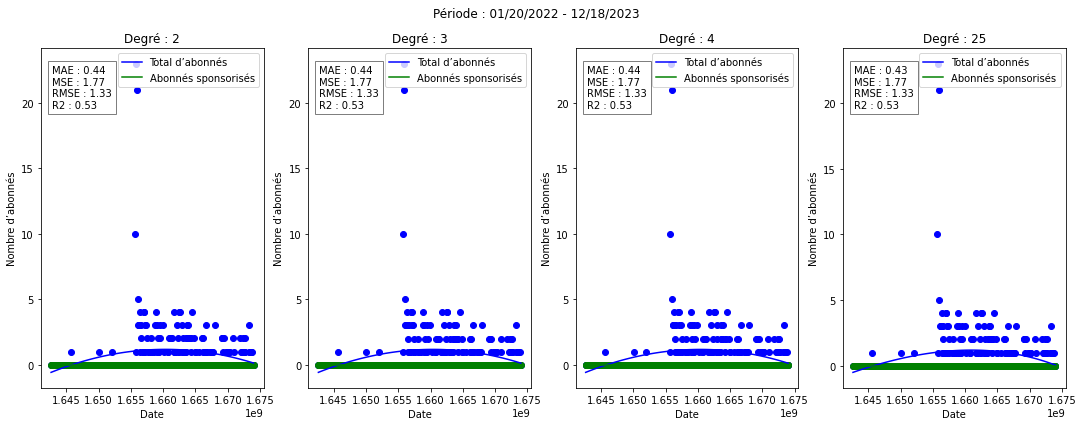

In [52]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

# Importer les données
data = pd.read_excel("C:/sqops_followers_1674217384515.xls")

# Convertir les dates en nombre flottant
x = []
for date in data['Date']:
    x.append(datetime.strptime(date, '%m/%d/%Y').timestamp())
x = np.array(x).reshape(-1, 1)

# Sélectionner les variables d'intérêt
y = data[['Total d’abonnés', 'Abonnés sponsorisés']]

# Définir les degrés de la régression polynomiale
degrees = [2, 3, 4, 25]

# Définir la période
period = (datetime(2022, 1, 20), datetime(2023, 12, 18))

# Tracer un graphique pour chaque degré de la régression polynomiale
fig, axes = plt.subplots(1, len(degrees), figsize=(15, 6))
for j, degree in enumerate(degrees):
    poly_reg = PolynomialFeatures(degree=degree)
    x_poly = poly_reg.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, y)

    # Obtenir les prédictions du modèle
    x_test = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
    x_test_poly = poly_reg.fit_transform(x_test)
    predictions = model.predict(x_test_poly)

    # Évaluer les performances du modèle
    mae = mean_absolute_error(y, model.predict(x_poly))
    rmse = np.sqrt(mean_squared_error(y, model.predict(x_poly)))
    mse = mean_squared_error(y, model.predict(x_poly))
    r2 = r2_score(y, model.predict(x_poly))

    # Tracer le graphique avec la courbe de régression polynomiale
    ax = axes[j]
    ax.set_title(f"Degré : {degree}")
    ax.plot(x_test, predictions[:, 0], color='blue', label='Total d’abonnés')
    ax.plot(x_test, predictions[:, 1], color='green', label='Abonnés sponsorisés')
    ax.scatter(x[:, 0], y.iloc[:, 0], color='blue')
    ax.scatter(x[:, 0], y.iloc[:, 1], color='green')
    ax.text(0.05, 0.95, f"MAE : {round(mae, 2)}\nMSE : {round(mse, 2)}\nRMSE : {round(rmse, 2)}\nR2 : {round(r2, 2)}", 
            transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    ax.set_xlabel('Date')
    ax.set_ylabel('Nombre d’abonnés')
    ax.legend()

plt.suptitle(f"Période : {period[0].strftime('%m/%d/%Y')} - {period[1].strftime('%m/%d/%Y')}")
plt.tight_layout()
plt.show()


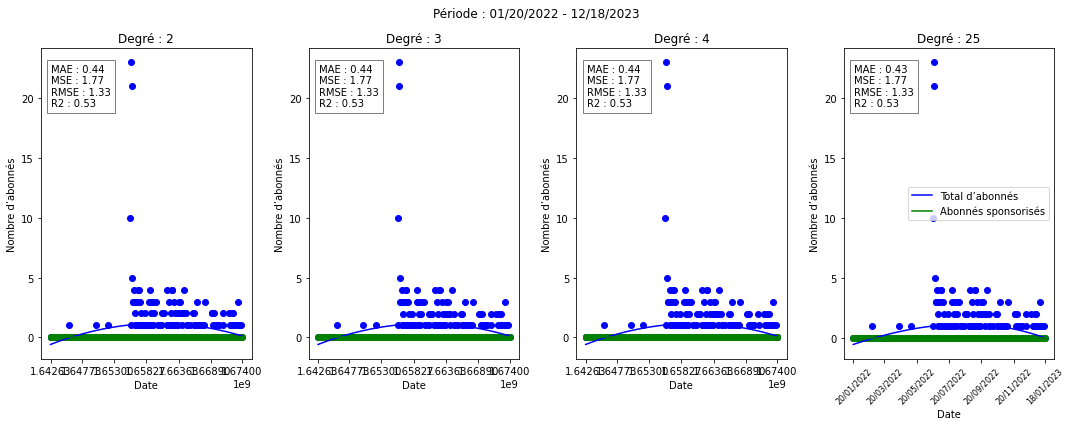

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

# Importer les données
data = pd.read_excel("C:/sqops_followers_1674217384515.xls")

# Convertir les dates en nombre flottant
x = []
for date in data['Date']:
    x.append(datetime.strptime(date, '%m/%d/%Y').timestamp())
x = np.array(x).reshape(-1, 1)

# Sélectionner les variables d'intérêt
y = data[['Total d’abonnés', 'Abonnés sponsorisés']]

# Définir les degrés de la régression polynomiale
degrees = [2, 3, 4, 25]

# Définir la période
period = (datetime(2022, 1, 20), datetime(2023, 12, 18))

# Tracer un graphique pour chaque degré de la régression polynomiale
fig, axes = plt.subplots(1, len(degrees), figsize=(15, 6))
for j, degree in enumerate(degrees):
    poly_reg = PolynomialFeatures(degree=degree)
    x_poly = poly_reg.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, y)

    # Obtenir les prédictions du modèle
    x_test = np.linspace(datetime(2022, 1, 20).timestamp(), datetime(2023, 1, 18).timestamp(), 100).reshape(-1, 1)
    x_test_poly = poly_reg.fit_transform(x_test)
    predictions = model.predict(x_test_poly)

    # Évaluer les performances du modèle
    mae = mean_absolute_error(y, model.predict(x_poly))
    rmse = np.sqrt(mean_squared_error(y, model.predict(x_poly)))
    mse = mean_squared_error(y, model.predict(x_poly))
    r2 = r2_score(y, model.predict(x_poly))

    # Tracer le graphique avec la courbe de régression polynomiale
    ax = axes[j]
    ax.set_title(f"Degré : {degree}")
    ax.plot(x_test, predictions[:, 0], color='blue', label='Total d’abonnés')
    ax.plot(x_test, predictions[:, 1], color='green', label='Abonnés sponsorisés')
    ax.scatter(x[:, 0], y.iloc[:, 0], color='blue')
    ax.scatter(x[:, 0], y.iloc[:, 1], color='green')
    ax.text(0.05, 0.95, f"MAE : {round(mae, 2)}\nMSE : {round(mse, 2)}\nRMSE : {round(rmse, 2)}\nR2 : {round(r2, 2)}", 
            transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    ax.set_xlabel('Date')
    ax.set_ylabel('Nombre d’abonnés')
    ax.set_xticks([datetime(2022, 1, 20).timestamp(), datetime(2022, 3, 20).timestamp(), datetime(2022, 5, 20).timestamp(), datetime(2022, 7, 20).timestamp(), datetime(2022, 9, 20).timestamp(), datetime(2022, 11, 20).timestamp(), datetime(2023, 1, 18).timestamp()])
ax.set_xticklabels(['20/01/2022', '20/03/2022', '20/05/2022', '20/07/2022', '20/09/2022', '20/11/2022', '18/01/2023'], rotation=45)
ax.tick_params(axis='x', labelsize=8)
ax.legend()

plt.suptitle(f"Période : {period[0].strftime('%m/%d/%Y')} - {period[1].strftime('%m/%d/%Y')}")
plt.tight_layout()
plt.show()


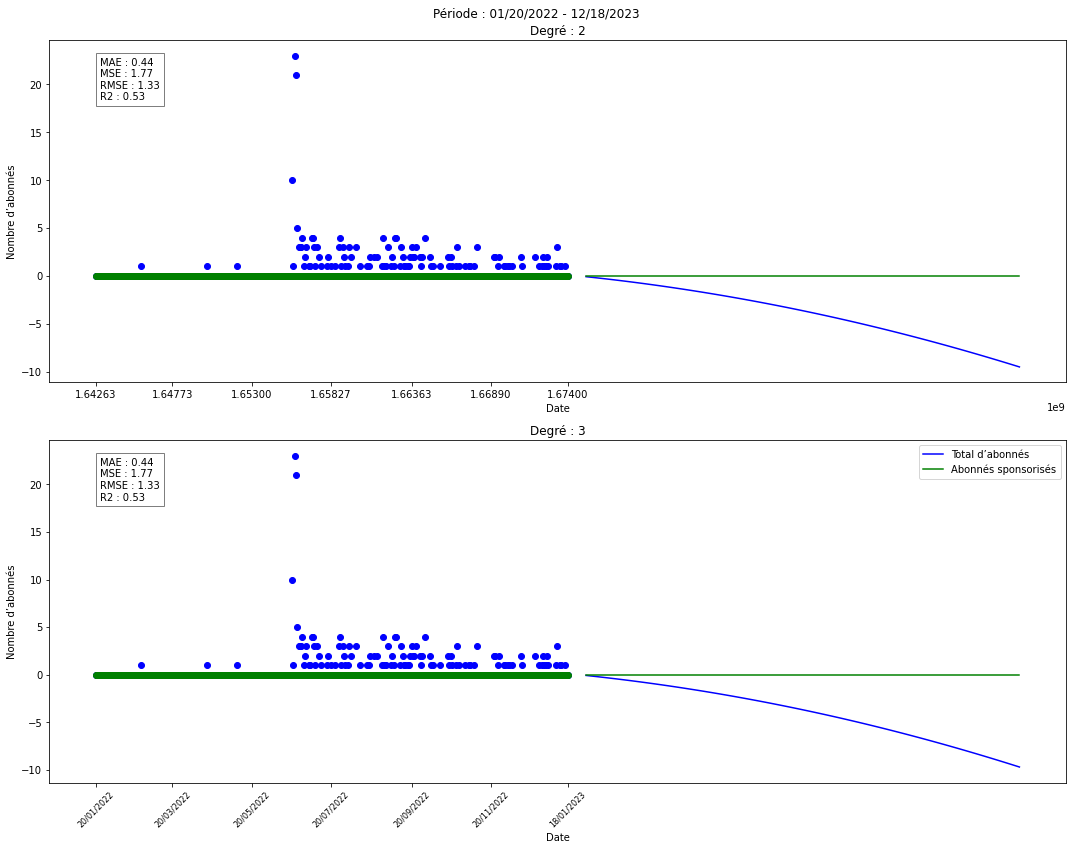

In [72]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

# Importer les données
data = pd.read_excel("C:/sqops_followers_1674217384515.xls")

# Convertir les dates en nombre flottant
x = []
for date in data['Date']:
    x.append(datetime.strptime(date, '%m/%d/%Y').timestamp())
x = np.array(x).reshape(-1, 1)

# Sélectionner les variables d'intérêt
y = data[['Total d’abonnés', 'Abonnés sponsorisés']]

# Définir les degrés de la régression polynomiale
degrees = [2,3]

# Définir la période
period = (datetime(2022, 1, 20), datetime(2023, 12, 18))

# Tracer un graphique pour chaque degré de la régression polynomiale
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

for j, degree in enumerate(degrees):
    poly_reg = PolynomialFeatures(degree=degree)
    x_poly = poly_reg.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, y)

    # Obtenir les prédictions du modèle
    x_test = np.linspace(datetime(2023, 2, 1).timestamp(), datetime(2023, 12, 31).timestamp(), 100).reshape(-1, 1)
    x_test_poly = poly_reg.fit_transform(x_test)
    predictions = model.predict(x_test_poly)

    # Évaluer les performances du modèle
    mae = mean_absolute_error(y, model.predict(x_poly))
    rmse = np.sqrt(mean_squared_error(y, model.predict(x_poly)))
    mse = mean_squared_error(y, model.predict(x_poly))
    r2 = r2_score(y, model.predict(x_poly))

    # Tracer le graphique avec la courbe de régression polynomiale
    ax = axes[j]
    ax.set_title(f"Degré : {degree}")
    ax.plot(x_test, predictions[:, 0], color='blue', label='Total d’abonnés')
    ax.plot(x_test, predictions[:, 1], color='green', label='Abonnés sponsorisés')
    ax.scatter(x[:, 0], y.iloc[:, 0], color='blue')
    ax.scatter(x[:, 0], y.iloc[:, 1], color='green')
    ax.text(0.05, 0.95, f"MAE : {round(mae, 2)}\nMSE : {round(mse, 2)}\nRMSE : {round(rmse, 2)}\nR2 : {round(r2, 2)}", 
            transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    ax.set_xlabel('Date')
    ax.set_ylabel('Nombre d’abonnés')
    ax.set_xticks([datetime(2022, 1, 20).timestamp(), datetime(2022, 3, 20).timestamp(), datetime(2022, 5, 20).timestamp(), datetime(2022, 7, 20).timestamp(), datetime(2022, 9, 20).timestamp(), datetime(2022, 11, 20).timestamp(), datetime(2023, 1, 18).timestamp()])
ax.set_xticklabels(['20/01/2022', '20/03/2022', '20/05/2022', '20/07/2022', '20/09/2022', '20/11/2022', '18/01/2023'], rotation=45)
ax.tick_params(axis='x', labelsize=8)
ax.legend()

plt.suptitle(f"Période : {period[0].strftime('%m/%d/%Y')} - {period[1].strftime('%m/%d/%Y')}")
plt.tight_layout()

#fig, axes = plt.subplots(1, len(degrees), figsize=(20, 20))
#plt.subplots_adjust(wspace=0.3)

plt.show()



In [ ]:
le code trace un graphique pour un degré de la régression polynomiale,
montrant les données historiques de "Sqops",les prévisions et les performances du modèle.
La courbe montre une diminution du nombre d'abonnés dans le futur à partir de 19 janvier 2023
par rapport à une intervalle de date historique allant de 20 janvier 2022 jusqu'à 18 janvier 2023
tandis que une évolution qui est constante au niveau des abonnés sponsorisés.

# IV. Régression Linéaire multiple par année

## IV.1 Sqops

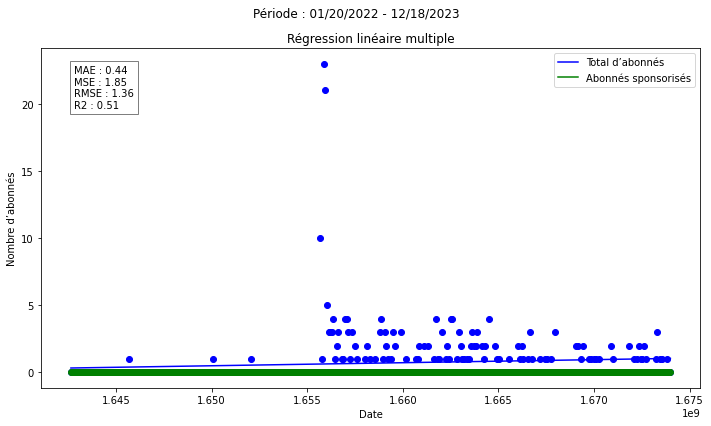

In [34]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Importer les données
data = pd.read_excel("C:/sqops_followers_1674217384515.xls")

#Convertir les dates en nombre flottant
x = []
for date in data['Date']:
    x.append(datetime.strptime(date, '%m/%d/%Y').timestamp())
x = np.array(x).reshape(-1, 1)

#Sélectionner les variables d'intérêt
y = data[['Total d’abonnés', 'Abonnés sponsorisés']]

#Définir la période
period = (datetime(2022, 1, 20), datetime(2023, 12, 18))

#Créer un modèle de régression linéaire multiple
model = LinearRegression()
model.fit(x, y)

#Obtenir les prédictions du modèle
predictions = model.predict(x)

#Évaluer les performances du modèle
mae = mean_absolute_error(y, predictions)
rmse = np.sqrt(mean_squared_error(y, predictions))
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)


#Tracer le graphique avec les valeurs observées et prédites
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Régression linéaire multiple")
ax.scatter(x, y.iloc[:, 0], color='blue')
ax.scatter(x, y.iloc[:, 1], color='green')
ax.plot(x, predictions[:, 0], color='blue', label='Total d’abonnés')
ax.plot(x, predictions[:, 1], color='green', label='Abonnés sponsorisés')
ax.text(0.05, 0.95, f"MAE : {round(mae, 2)}\nMSE : {round(mse, 2)}\nRMSE : {round(rmse, 2)}\nR2 : {round(r2, 2)}",
transform=ax.transAxes, fontsize=10,
verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax.set_xlabel('Date')
ax.set_ylabel('Nombre d’abonnés')
ax.legend()

plt.suptitle(f"Période : {period[0].strftime('%m/%d/%Y')} - {period[1].strftime('%m/%d/%Y')}")
plt.tight_layout()
plt.show()

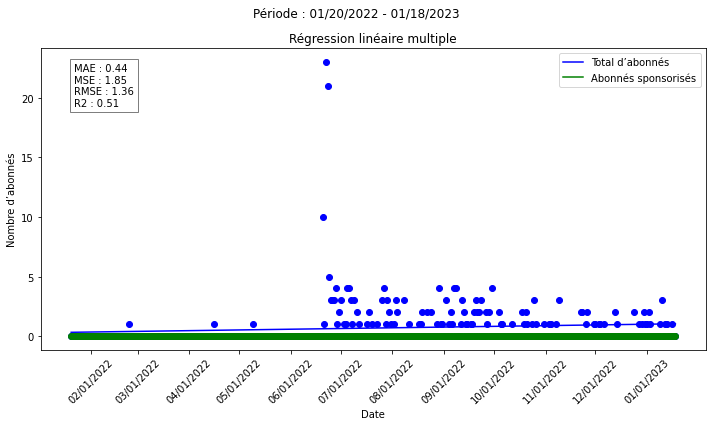

In [37]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Importer les données
data = pd.read_excel("C:/sqops_followers_1674217384515.xls")

#Convertir les dates en nombre flottant
x = []
for date in data['Date']:
    x.append(datetime.strptime(date, '%m/%d/%Y').timestamp())
x = np.array(x).reshape(-1, 1)

#Sélectionner les variables d'intérêt
y = data[['Total d’abonnés', 'Abonnés sponsorisés']]

#Définir la période
period = (datetime(2022, 1, 20), datetime(2023, 1, 18))

#Créer un modèle de régression linéaire multiple
model = LinearRegression()
model.fit(x, y)

#Obtenir les prédictions du modèle
predictions = model.predict(x)

#Évaluer les performances du modèle
mae = mean_absolute_error(y, predictions)
rmse = np.sqrt(mean_squared_error(y, predictions))
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

#Tracer le graphique avec les valeurs observées et prédites
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Régression linéaire multiple")
ax.scatter(x, y.iloc[:, 0], color='blue')
ax.scatter(x, y.iloc[:, 1], color='green')
ax.plot(x, predictions[:, 0], color='blue', label='Total d’abonnés')
ax.plot(x, predictions[:, 1], color='green', label='Abonnés sponsorisés')
ax.text(0.05, 0.95, f"MAE : {round(mae, 2)}\nMSE : {round(mse, 2)}\nRMSE : {round(rmse, 2)}\nR2 : {round(r2, 2)}",
transform=ax.transAxes, fontsize=10,
verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax.set_xlabel('Date')
ax.set_ylabel('Nombre d’abonnés')
ax.legend()

#Utiliser les dates comme étiquettes pour l'axe x
date_labels = pd.date_range(start=period[0], end=period[1], freq='MS').strftime('%m/%d/%Y')
ax.set_xticks([datetime.strptime(d, '%m/%d/%Y').timestamp() for d in date_labels])
ax.set_xticklabels(date_labels, rotation=45)

plt.suptitle(f"Période : {period[0].strftime('%m/%d/%Y')} - {period[1].strftime('%m/%d/%Y')}")
plt.tight_layout()
plt.show()

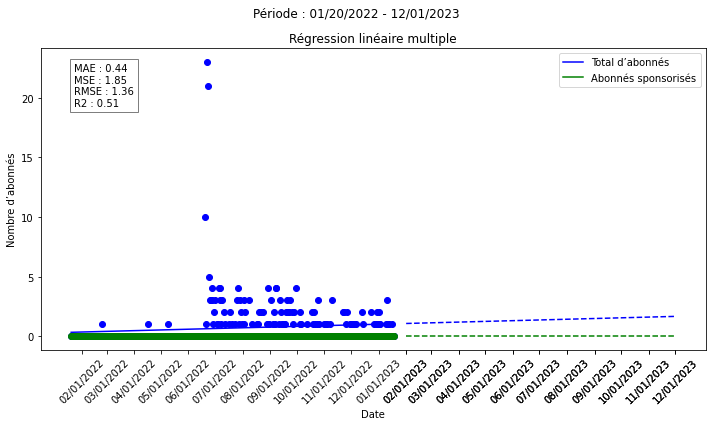

In [41]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Importer les données
data = pd.read_excel("C:/sqops_followers_1674217384515.xls")

# Convertir les dates en nombre flottant
x = []
for date in data['Date']:
    x.append(datetime.strptime(date, '%m/%d/%Y').timestamp())
x = np.array(x).reshape(-1, 1)

# Sélectionner les variables d'intérêt
y = data[['Total d’abonnés', 'Abonnés sponsorisés']]

# Définir la période
period = (datetime(2022, 1, 20), datetime(2023, 12, 18))

# Créer un modèle de régression linéaire multiple
model = LinearRegression()
model.fit(x, y)
# Prévoir les valeurs pour les mois de février à décembre 2023
future_dates = pd.date_range(start='2023-02-01', end='2023-12-01', freq='MS').strftime('%m/%d/%Y')
future_x = []
for date in future_dates:
    future_x.append(datetime.strptime(date, '%m/%d/%Y').timestamp())
future_x = np.array(future_x).reshape(-1, 1)
future_predictions = model.predict(future_x)

# Obtenir toutes les prédictions (valeurs passées et futures)
all_predictions = np.concatenate((predictions, future_predictions), axis=0)

# Évaluer les performances du modèle
mae = mean_absolute_error(y, predictions)
rmse = np.sqrt(mean_squared_error(y, predictions))
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

# Tracer le graphique avec les valeurs observées et prédites
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Régression linéaire multiple")
ax.scatter(x, y.iloc[:, 0], color='blue')
ax.scatter(x, y.iloc[:, 1], color='green')
ax.plot(x, predictions[:, 0], color='blue', label='Total d’abonnés')
ax.plot(x, predictions[:, 1], color='green', label='Abonnés sponsorisés')
ax.plot(future_x, future_predictions[:, 0], color='blue', linestyle='--')
ax.plot(future_x, future_predictions[:, 1], color='green', linestyle='--')
ax.text(0.05, 0.95, f"MAE : {round(mae, 2)}\nMSE : {round(mse, 2)}\nRMSE : {round(rmse, 2)}\nR2 : {round(r2, 2)}",
        transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax.set_xlabel('Date')
ax.set_ylabel('Nombre d’abonnés')
ax.legend()

# Utiliser les dates comme étiquettes pour l'axe x
date_labels = pd.date_range(start=period[0], end=period[1], freq='MS').strftime('%m/%d/%Y')
date_labels = np.concatenate((date_labels, future_dates))
ax.set_xticks([datetime.strptime(d, '%m/%d/%Y').timestamp() for d in date_labels])
ax.set_xticklabels(date_labels, rotation=45)

# Effacer le premier graphique
#plt.clf()
plt.suptitle(f"Période : {period[0].strftime('%m/%d/%Y')} - {future_dates[-1]}")
plt.tight_layout()
plt.show()


In [ ]:
Cette courbe permet d'afficher la prédiction  du  total d'abonnés à
partir de la date 19/01/2023 à travers des dates du passé allant de 20/01/2022
jusqua 18/01/2023 et montrer les métriques d'évaluation R2 , MAE,MSE,RMSE etc...

## IV.2 Dataraise

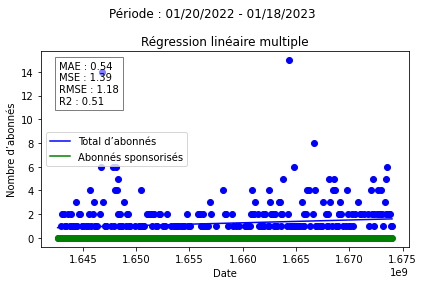

In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Importer les données
data = pd.read_excel("C:/dataraise_followers_1674217463832.xls")

#Convertir les dates en nombre flottant
x = []
for date in data['Date']:
    x.append(datetime.strptime(date, '%m/%d/%Y').timestamp())
x = np.array(x).reshape(-1, 1)

#Sélectionner les variables d'intérêt
y = data[['Total d’abonnés', 'Abonnés sponsorisés']]

#Définir la période
period = (datetime(2022, 1, 20), datetime(2023, 1, 18))

#Créer un modèle de régression linéaire multiple
model = LinearRegression()
model.fit(x, y)

#Obtenir les prédictions du modèle
predictions = model.predict(x)

#Évaluer les performances du modèle
mae = mean_absolute_error(y, predictions)
rmse = np.sqrt(mean_squared_error(y, predictions))
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

#Tracer le graphique avec les valeurs observées et prédites
fig, ax = plt.subplots()
ax.set_title("Régression linéaire multiple")
ax.scatter(x, y.iloc[:, 0], color='blue')
ax.scatter(x, y.iloc[:, 1], color='green')
ax.plot(x, predictions[:, 0], color='blue', label='Total d’abonnés')
ax.plot(x, predictions[:, 1], color='green', label='Abonnés sponsorisés')
ax.text(0.05, 0.95, f"MAE : {round(mae, 2)}\nMSE : {round(mse, 2)}\nRMSE : {round(rmse, 2)}\nR2 : {round(r2, 2)}",
transform=ax.transAxes, fontsize=10,
verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax.set_xlabel('Date')
ax.set_ylabel('Nombre d’abonnés')
ax.legend()

plt.suptitle(f"Période : {period[0].strftime('%m/%d/%Y')} - {period[1].strftime('%m/%d/%Y')}")
plt.tight_layout()
plt.show()

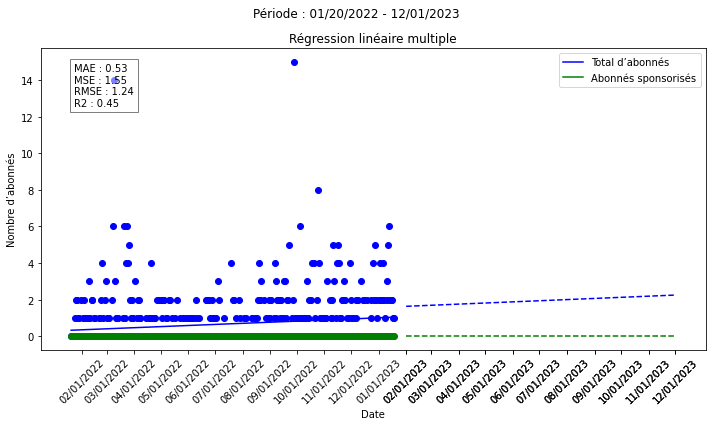

In [40]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Importer les données
data = pd.read_excel("C:/dataraise_followers_1674217463832.xls")

# Convertir les dates en nombre flottant
x = []
for date in data['Date']:
    x.append(datetime.strptime(date, '%m/%d/%Y').timestamp())
x = np.array(x).reshape(-1, 1)

# Sélectionner les variables d'intérêt
y = data[['Total d’abonnés', 'Abonnés sponsorisés']]

# Définir la période
period = (datetime(2022, 1, 20), datetime(2023, 12, 18))

# Créer un modèle de régression linéaire multiple
model = LinearRegression()
model.fit(x, y)
# Prévoir les valeurs pour les mois de février à décembre 2023
future_dates = pd.date_range(start='2023-02-01', end='2023-12-01', freq='MS').strftime('%m/%d/%Y')
future_x = []
for date in future_dates:
    future_x.append(datetime.strptime(date, '%m/%d/%Y').timestamp())
future_x = np.array(future_x).reshape(-1, 1)
future_predictions = model.predict(future_x)

# Obtenir toutes les prédictions (valeurs passées et futures)
all_predictions = np.concatenate((predictions, future_predictions), axis=0)

# Évaluer les performances du modèle
mae = mean_absolute_error(y, predictions)
rmse = np.sqrt(mean_squared_error(y, predictions))
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

# Tracer le graphique avec les valeurs observées et prédites
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Régression linéaire multiple")
ax.scatter(x, y.iloc[:, 0], color='blue')
ax.scatter(x, y.iloc[:, 1], color='green')
ax.plot(x, predictions[:, 0], color='blue', label='Total d’abonnés')
ax.plot(x, predictions[:, 1], color='green', label='Abonnés sponsorisés')
ax.plot(future_x, future_predictions[:, 0], color='blue', linestyle='--')
ax.plot(future_x, future_predictions[:, 1], color='green', linestyle='--')
ax.text(0.05, 0.95, f"MAE : {round(mae, 2)}\nMSE : {round(mse, 2)}\nRMSE : {round(rmse, 2)}\nR2 : {round(r2, 2)}",
        transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax.set_xlabel('Date')
ax.set_ylabel('Nombre d’abonnés')
ax.legend()

# Utiliser les dates comme étiquettes pour l'axe x
date_labels = pd.date_range(start=period[0], end=period[1], freq='MS').strftime('%m/%d/%Y')
date_labels = np.concatenate((date_labels, future_dates))
ax.set_xticks([datetime.strptime(d, '%m/%d/%Y').timestamp() for d in date_labels])
ax.set_xticklabels(date_labels, rotation=45)

# Effacer le premier graphique
#plt.clf()
plt.suptitle(f"Période : {period[0].strftime('%m/%d/%Y')} - {future_dates[-1]}")
plt.tight_layout()
plt.show()


# V. Evaluation des résultats

## V.1 Sqops

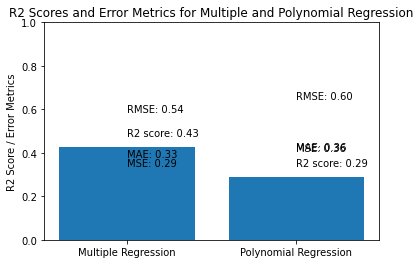

In [255]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt


# Importer les données
data = pd.read_excel("C:/sqops_followers_1674217384515.xls")
data['Year'] = pd.to_datetime(data['Date']).dt.year
data['Month'] = pd.to_datetime(data['Date']).dt.month

X = data[['Year', 'Month']]
y = data[['Total d’abonnés', 'Abonnés sponsorisés']]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multiple linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred_ml = reg.predict(X_test)
r2_ml = r2_score(y_test, y_pred_ml)
mae_ml = mean_absolute_error(y_test, y_pred_ml)
mse_ml = mean_squared_error(y_test, y_pred_ml)
rmse_ml = np.sqrt(mse_ml)

# Polynomial regression model
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
reg_poly = LinearRegression()
reg_poly.fit(X_train_poly, y_train)
y_pred_poly = reg_poly.predict(X_test_poly)
r2_poly = r2_score(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)

# Plot the results
#fig, ax = plt.subplots(figsize=(12, 8), dpi=100)
fig, ax = plt.subplots()
ax.bar(['Multiple Regression', 'Polynomial Regression'], [r2_ml, r2_poly])
ax.set_ylim([0, 1])
ax.set_ylabel('R2 Score / Error Metrics')
ax.set_title(f'R2 Scores and Error Metrics for Multiple and Polynomial Regression')

ax.text(0, r2_ml+0.05, f"R2 score: {r2_ml:.2f}")
ax.text(1, r2_poly+0.05, f"R2 score: {r2_poly:.2f}")

ax.text(0, mae_ml+0.05, f"MAE: {mae_ml:.2f}")
ax.text(1, mae_poly+0.05, f"MAE: {mae_poly:.2f}")

ax.text(0, mse_ml+0.05, f"MSE: {mse_ml:.2f}")
ax.text(1, mse_poly+0.05, f"MSE: {mse_poly:.2f}")

ax.text(0, rmse_ml+0.05, f"RMSE: {rmse_ml:.2f}")
ax.text(1, rmse_poly+0.05, f"RMSE: {rmse_poly:.2f}")

plt.show()


## V.2 Dataraise

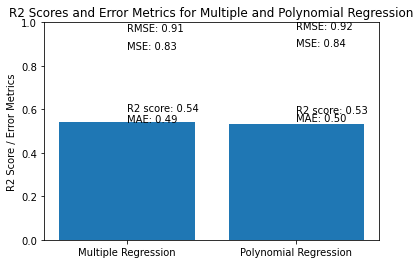

In [254]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt


#Importer les données
data = pd.read_excel("C:/dataraise_followers_1674217463832.xls")
data['Year'] = pd.to_datetime(data['Date']).dt.year
data['Month'] = pd.to_datetime(data['Date']).dt.month

X = data[['Year', 'Month']]
y = data[['Total d’abonnés', 'Abonnés sponsorisés']]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multiple linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred_ml = reg.predict(X_test)
r2_ml = r2_score(y_test, y_pred_ml)
mae_ml = mean_absolute_error(y_test, y_pred_ml)
mse_ml = mean_squared_error(y_test, y_pred_ml)
rmse_ml = np.sqrt(mse_ml)

# Polynomial regression model
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
reg_poly = LinearRegression()
reg_poly.fit(X_train_poly, y_train)
y_pred_poly = reg_poly.predict(X_test_poly)
r2_poly = r2_score(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)

# Plot the results
#fig, ax = plt.subplots(figsize=(12, 8), dpi=100)
fig, ax = plt.subplots()
ax.bar(['Multiple Regression', 'Polynomial Regression'], [r2_ml, r2_poly])
ax.set_ylim([0, 1])
ax.set_ylabel('R2 Score / Error Metrics')
ax.set_title(f'R2 Scores and Error Metrics for Multiple and Polynomial Regression')
  
ax.text(0, r2_ml+0.05, f"R2 score: {r2_ml:.2f}")
ax.text(1, r2_poly+0.05, f"R2 score: {r2_poly:.2f}")

ax.text(0, mae_ml+0.05, f"MAE: {mae_ml:.2f}")
ax.text(1, mae_poly+0.05, f"MAE: {mae_poly:.2f}")

ax.text(0, mse_ml+0.05, f"MSE: {mse_ml:.2f}")
ax.text(1, mse_poly+0.05, f"MSE: {mse_poly:.2f}")

ax.text(0, rmse_ml+0.05, f"RMSE: {rmse_ml:.2f}")
ax.text(1, rmse_poly+0.05, f"RMSE: {rmse_poly:.2f}")

plt.show()


# VI. Interprétation des résultats

## VI.1 Données Dataraise

In [ ]:
Les résultats montrent que les deux modèles de régression ont des performances similaires.
Le coefficient de détermination R2 pour la régression multiple est de 0,54, ce qui signifie que 54% de la variance dans les données peut être expliquée par le modèle. 
Le R2 pour la régression polynomiale est légèrement inférieur à 0,53, ce qui signifie que le modèle explique 53% de la variance. 
Les valeurs d erreur MSE, RMSE et MAE sont également très similaires pour les deux modèles, ce qui indique que les prévisions des deux modèles sont proches de la réalité. 

## VI.2 Données Sqops

In [ ]:
Les résultats montrent que les deux modèles de régression ont des performances similaires.
Le coefficient de détermination R2 pour la régression multiple est de 0,43, ce qui signifie que 43% de la variance dans les données peut être expliquée par le modèle. 
Le R2 pour la régression polynomiale est à 0,29, ce qui signifie que le modèle explique 29% de la variance. 
Les valeurs d erreur MSE, RMSE et MAE sont également très similaires pour les deux modèles, ce qui indique que les prévisions des deux modèles sont proches de la réalité.